## Deep Learning: 

<pre>
1. ImageDataGenerator
2. Pipeline using tf.data
</pre>

<pre>
As discussed in Previous notebooks, to train NN efficintly with less train time, we have to write better data pipelines. For Images, Keras is giving ImageDataGenerator to get images to RAM/GPU in batches. But you can write your own pipelines with tf.data API.  
</pre>

Download the data from <a href='https://www.kaggle.com/prasunroy/natural-images'>here</a>

<pre>
<b>ImageDataGenerator</b>
</pre>

In [1]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd

In [2]:
dir_path = "natural_images"

In [3]:
os.listdir(dir_path)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [4]:
for i in os.listdir(dir_path):
    print("No of Images in ",i," category is ",len(os.listdir(os.path.join(dir_path,i))))

No of Images in  airplane  category is  727
No of Images in  car  category is  968
No of Images in  cat  category is  885
No of Images in  dog  category is  702
No of Images in  flower  category is  843
No of Images in  fruit  category is  1000
No of Images in  motorbike  category is  788
No of Images in  person  category is  986


In [5]:
#import openCV
import cv2

In [6]:
##Getting size of images
list_of_heights = []
list_of_widths = []
for i in os.listdir(dir_path):
    for image in os.listdir(os.path.join(dir_path,i)):
        img = cv2.imread(os.path.join(os.path.join(dir_path,i),image), cv2.IMREAD_UNCHANGED)
        # get dimensions of image
        shape = img.shape
        list_of_heights.append(shape[0])
        list_of_widths.append(shape[1])     

Text(0.5,1,'heights')

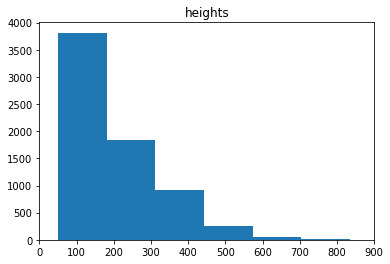

In [7]:
##plotting 
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(list_of_heights,bins=20)
plt.xlim(0,900)
plt.title('heights')

(0, 900)

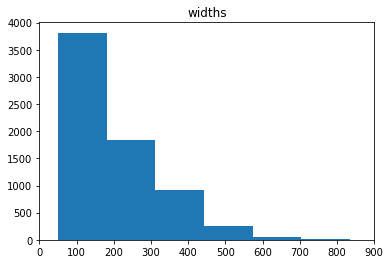

In [8]:
plt.hist(list_of_heights,bins=20)
plt.title('widths')
plt.xlim(0,900)

In [9]:
np.median(list_of_heights)

122.0

In [10]:
np.mean(list_of_heights)

198.1923467169155

In [11]:
np.median(list_of_widths)

231.0

In [12]:
np.mean(list_of_widths)

234.86911146542977

In [13]:
###Image data Generator class
ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator()
##We are fitting the data to Image data generator.
ImageGenerator = ImageFlow.flow_from_directory(dir_path,target_size=(156,256),seed=10,batch_size=1)

Found 6899 images belonging to 8 classes.


In [14]:
##Checking time taken to load images. 
import time
start = time.time()
total_batches = 0
for e in range(1):
    batches = 0
    per_batch = 32
    for x_batch, y_batch in ImageGenerator:
        batches += 1
        if batches >= 6899/per_batch:
            total_batches = total_batches + batches
            break 
end = time.time()
duration = end-start
print("{} batches: {} s".format(total_batches, duration))
print("{:0.5f} Images/s".format(per_batch*total_batches/duration))

216 batches: 0.8140788078308105 s
8490.57847 Images/s


In [15]:
#importing tensorflow
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten
from tensorflow.keras.models import Model
import random as rn

In [16]:
import os
os.environ['PYTHONHASHSEED'] = '0'

##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graph size will increses. 
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()

## Set the random seed values to regenerate the model.
np.random.seed(0)
tf.set_random_seed(0)
rn.seed(0)

#Input layer
input_layer = Input(shape=(156,256,3),name='Input_Layer')

#Conv Layer
Conv1 = Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv1')(input_layer)
#MaxPool Layer
Pool1 = MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',name='Pool1')(Conv1)


Conv2 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=3),name='Conv2')(Pool1)
Conv3 = Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=5),name='Conv3')(Conv2)
#MaxPool Layer
Pool2 = MaxPool2D(pool_size=(2,2),strides=(1,1),padding='valid',data_format='channels_last',name='Pool2')(Conv3)


Conv4 = Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=9),name='Conv4')(Pool2)
#MaxPool Layer
Pool3 = MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',name='Pool3')(Conv4)



#Flatten
flatten = Flatten(data_format='channels_last',name='Flatten')(Pool3)

#FC layer
FC1 = Dense(units=30,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='FC1')(flatten)

#FC layer
FC2 = Dense(units=15,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=33),name='FC2')(FC1)

#output layer
Out = Dense(units=8,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(FC2)

#Creating a model
model = Model(inputs=input_layer,outputs=Out)

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     (None, 156, 256, 3)       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 154, 254, 32)      896       
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 77, 127, 32)       0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 75, 125, 64)       18496     
_________________________________________________________________
Conv3 (Conv2D)               (None, 37, 62, 64)        36928     
_________________________________________________________________
Pool2 (MaxPooling2D)         (None, 36, 61, 64)        0         
_________________________________________________________________
Conv4 (Conv2D)               (None, 17, 30, 128)       73856     
__________

In [18]:
#compiling 
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [20]:
##fitting generator
model.fit_generator(ImageGenerator, epochs=1)
# sess = tf.Session()

Instructions for updating:
Use tf.cast instead.
6899/6899 [==============================] - 108s 16ms/step - loss: 13.8566 - acc: 0.1403


<pre>
<b>Data Pipelines with TensorFlow</b>
</pre>

In [21]:
#importing pathlib
#please check https://docs.python.org/3/library/pathlib.html  to know about pathlib
import pathlib
data_root = pathlib.Path(dir_path)
print(data_root)

natural_images


In [22]:
##getting all the directories
list(data_root.iterdir())

[WindowsPath('natural_images/airplane'),
 WindowsPath('natural_images/car'),
 WindowsPath('natural_images/cat'),
 WindowsPath('natural_images/dog'),
 WindowsPath('natural_images/flower'),
 WindowsPath('natural_images/fruit'),
 WindowsPath('natural_images/motorbike'),
 WindowsPath('natural_images/person')]

In [23]:
##Getting all image paths
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
##shuffling the images 
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

6899

In [24]:
#List the available labels
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [25]:
#Assign an index to each label
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

In [26]:
#Create a list of every file, and its label index
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]

In [27]:
def tfdata_generator(images, labels, is_training, batch_size=32):
    '''Construct a data generator using tf.Dataset'''
    
    def parse_function(filename, label):
        #reading path 
        image_string = tf.read_file(filename)
        #decoding image
        image = tf.image.decode_jpeg(image_string, channels=3)

        # This will convert to float values in [0, 1]
        image = tf.image.convert_image_dtype(image, tf.float32)
        #resize the image
        image = tf.image.resize_images(image, [156, 256])
        #one hot coding for label
        y = tf.one_hot(tf.cast(label, tf.uint8), 8)
        return image, y
    
    ##creating a dataset from tensorslices
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    
    if is_training:
        # https://stackoverflow.com/a/53517848/4084039
        dataset = dataset.shuffle(5000)  # depends on sample size

    # Transform and batch data at the same time
    dataset = dataset.apply(tf.data.experimental.map_and_batch( parse_function, batch_size,num_parallel_batches=2,  # cpu cores
        drop_remainder=True if is_training else False))
    
    #repeat the dataset indefinitely
    dataset = dataset.repeat()
    
    #prefetch the data into CPU/GPU
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

    return dataset

In [28]:
# tf.keras.backend.clear_session()

In [29]:
tf_image_generator = tfdata_generator(all_image_paths, all_image_labels, is_training=True, batch_size=1)
tf_image_iterator = tf_image_generator.make_one_shot_iterator()

In [30]:
model.fit(tf_image_iterator,steps_per_epoch=216,epochs=1)

216/216 [==============================] - 4s 19ms/step - loss: 13.5064 - acc: 0.1620


<pre>
1. The order is important.

  - A <b>shuffle</b> after a <b>repeat</b> would shuffle items across epoch boundaries (some items will be seen twice before others are seen at all).
  - A <b>shuffle</b> after a <b>batch</b> would shuffle the order of the batches, but not shuffle the items across batches.

2. We use a <b>buffer_size</b> the same size as the dataset for a full shuffle. Up to the dataset size, large values provide better randomization, but use more memory.

3. The shuffle buffer is filled before any elements are pulled from it. So a large <b>buffer_size</b> may cause a delay when your Dataset is starting.

</pre>

<pre>
<b> using Cache</b>
</pre>

In [31]:
def tfdata_generator(images, labels, is_training, batch_size=32):
    '''Construct a data generator using tf.Dataset'''
    
    def parse_function(filename, label):
        #reading path 
        image_string = tf.read_file(filename)
        #decoding image
        image = tf.image.decode_jpeg(image_string, channels=3)

        # This will convert to float values in [0, 1]
        image = tf.image.convert_image_dtype(image, tf.float32)
        
        image = tf.image.resize_images(image, [156, 256])
        
        y = tf.one_hot(tf.cast(label, tf.uint8), 8)
        return image, y

    dataset = tf.data.Dataset.from_tensor_slices((images, labels))

    # Transform and batch data at the same time
    dataset = dataset.map(parse_function,4)
    
    dataset = dataset.cache('./tf-data')
    
    dataset = dataset.apply(tf.data.experimental.shuffle_and_repeat(buffer_size=1000))
    dataset = dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

In [32]:
tf.keras.backend.clear_session()

In [33]:
sess = tf.Session()
tf_image_generator = tfdata_generator(all_image_paths, all_image_labels, is_training=True, batch_size=32)
iterator = tf_image_generator.make_one_shot_iterator()
next_element = iterator.get_next()

In [34]:
start = time.time()
for batch in range(432):
    sess.run(next_element)
end = time.time()
duration = end-start
print("{} batches: {} s".format(432, duration))
print("{:0.5f} Images/s".format(32*432/duration))

432 batches: 60.55071711540222 s
228.30448 Images/s


<pre>
<b>Image augmentation</b>
</pre>

In [35]:
def tfdata_generator(images, labels, is_training, batch_size=32):
    '''Construct a data generator using tf.Dataset'''
    
    def parse_function(filename,labels):
        #reading path 
        image_string = tf.read_file(filename)
        #decoding image
        image = tf.image.decode_jpeg(image_string, channels=3)

        # This will convert to float values in [0, 1]
        image = tf.image.convert_image_dtype(image, tf.float32)
        
        image = tf.image.resize_images(image, [156, 256])
        
        y = tf.one_hot(tf.cast(labels, tf.uint8), 8)
        return image,y
    
    def flip(image,labels):
        
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_flip_up_down(image)
        
        return image,labels
    
    def rotate(image,labels):

        return tf.image.rot90(image, tf.random_uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)),labels
    
    def color(image,labels):
        image = tf.image.random_hue(image, 0.08)
        image = tf.image.random_saturation(image, 0.6, 1.6)
        image = tf.image.random_brightness(image, 0.05)
        image = tf.image.random_contrast(image, 0.7, 1.3)
        return image,labels
    
    dataset = tf.data.Dataset.from_tensor_slices((images,labels))
    
    if is_training:
        dataset = dataset.shuffle(5000)  # depends on sample size
        
    # Transform and batch data at the same time
    dataset = dataset.map(parse_function, num_parallel_calls=4)
    
    augmentations = [flip,rotate,color]
    
        
    for f in augmentations:
        if np.random.uniform(0,1)>0.6:
            dataset = dataset.map(f,num_parallel_calls=4)
    
    dataset = dataset.repeat()
    
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

<pre>
Check <a href='https://androidkt.com/tensorflow-image-augmentation-using-tf-image/'>this</a> link for Image Augmentation tech in Tensorflow.

In [36]:
tf.keras.backend.clear_session()
sess = tf.Session()
tf_image_generator = tfdata_generator(all_image_paths, all_image_labels, is_training=True, batch_size=1)
iterator = tf_image_generator.make_one_shot_iterator()
next_element = iterator.get_next()

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

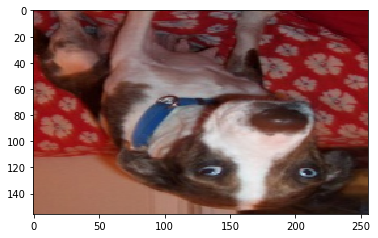

In [38]:
for batch in range(1):
    x_,y_=sess.run(next_element)
    plt.imshow(x_)